## Case Study

Supermarket* is a global company, but for the purposes of this presentation, please just consider the UK business

Supermarket* have several databases including:

Names and addresses of customers and when they joined the Clubcard Loyalty Program. 
All transactions made by any customer shopping instore or online. 
If the customer has used their Clubcard we are able to track those customer transactions over time. 
All products bought within a transaction are captured along with spend and if the product was on promotion.
 
What are the main challenges facing Supermarket* today and how would you use this data to understand and action?

We ask you keep to a strict 10 minutes. As this is a short amount of time please focus on the area(s) that you feel would provide maximum benefit to Supermarket*. We may look to delve deeper into some of your suggestions so be prepared to answer follow-up questions.  Within your presentation, please include examples of

- How you would use this data to understand Supermarket* customers?
- How you would apply customer-models and/or data science techniques to address some of these challenges?
- How you could use this data to personalise Supermarket* communications?

### As I don't have any data for this case study, I decided to create a dataset whose features could resemble Supermarket* features.
### I would start my analysis by understanding the characteristics of my top spending custumers and their behaviours, generating insights only for this important subset of the population.

Column descriptions 
- ID - Customer ID 
- Age -  Customer's age
- Income -  Predicted annual income of the customer 
- Club Card Age - Years since the customer made the Club Card
- Avg Monthly Grocery - Average number of purchases per month in Supermarket*
- ZIP Code - Home Address ZIP code
- Family - Family size of the customer 
- Store Type - Most frequent store type used by the customer Level. 1: Supermarket* Express; 2: Extra; 3: Super
- Online - 1 if the majority of the purchase are online, 0 in store
- CreditCard -  1 if the the customer use a credit card
- Opt In - 1 if the custumer opted in to receive offers and promotions
- Top Customers - 1 if the custumer belong to the top 10% of the most spending clients (Y)

## Data Pre-processing

Import Libraries

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots
import statsmodels.api as sm
from scipy import stats
import shap
import random
import category_encoders as ce
from IPython.display import display, Image
import pydot
import os
from apyori import apriori

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

Load and review data

In [18]:
df = pd.read_csv("Customers.csv")
df = df.set_index('ID')
df.head(15)

,Age,Income,Club Card Age,Avg Monthly Grocery,ZIP Code,Family,Store Type,Online,CreditCard,Opt in,Top Customers
ID,,,,,,,,,,,
1,25,49,0.25,1.6,91107,4,1,0,0,0,0
2,45,34,4.75,1.5,90089,3,1,0,0,0,0
3,39,11,3.75,1.0,94720,1,1,0,0,0,0
4,35,100,2.25,2.7,94112,1,2,0,0,0,0
5,35,45,2.00,1.0,91330,4,2,0,1,0,0
6,37,29,3.25,0.4,92121,4,2,1,0,0,0
7,53,72,6.75,1.5,91711,2,2,1,0,0,0
8,50,22,6.00,0.3,93943,1,3,0,1,0,0
9,35,81,2.50,0.6,90089,3,2,1,0,0,0


Creating new features from the raw data is one of the best ways to improve the model. For example, I can calculate the Income per member of the Family. The features you create are different for every dataset, so it takes a bit of creativity and experimentation. We're a bit limited here since we're working with only one table. Typically you'll have access to multiple tables with relevant data that you can use to create new features.

Since the porpuse of this case study is only theoretical, I am not going to spend a lot of time on this very important process (it is also one of the most time-consuming steps).

In [3]:
df['Member Income'] = df.Income / df.Family

Check if there is any null value in data set

In [4]:
df.isnull().isnull().sum()

Age                    0
Income                 0
Club Card Age          0
Avg Monthly Grocery    0
ZIP Code               0
Family                 0
Store Type             0
Online                 0
CreditCard             0
Opt in                 0
Top Customers          0
Member Income          0
dtype: int64

Summary statistics of the dataframe 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.00,35.0,45.0,55.0,67.00
Income,5000.0,73.774200,46.033729,8.00,39.0,64.0,98.0,224.00
Club Card Age,5000.0,5.026150,2.866988,-0.75,2.5,5.0,7.5,10.75
Avg Monthly Grocery,5000.0,1.937938,1.747659,0.00,0.7,1.5,2.5,10.00
ZIP Code,5000.0,93152.503000,2121.852197,9307.00,91911.0,93437.0,94608.0,96651.00
Family,5000.0,2.396400,1.147663,1.00,1.0,2.0,3.0,4.00
Store Type,5000.0,1.881000,0.839869,1.00,1.0,2.0,3.0,3.00
Online,5000.0,0.596800,0.490589,0.00,0.0,1.0,1.0,1.00
CreditCard,5000.0,0.294000,0.455637,0.00,0.0,0.0,1.0,1.00
Opt in,5000.0,0.060400,0.238250,0.00,0.0,0.0,0.0,1.00


Identify Correlation in data 

In [6]:
df.corr() 

,Age,Income,Club Card Age,Avg Monthly Grocery,ZIP Code,Family,Store Type,Online,CreditCard,Opt in,Top Customers,Member Income
Age,1.000000,-0.055269,0.994215,-0.052012,-0.029216,-0.046418,0.041334,0.013702,0.007681,0.008043,-0.005770,-0.018619
Income,-0.055269,1.000000,-0.046574,0.645984,-0.016410,-0.157501,-0.187524,0.014206,-0.002385,0.169738,0.487835,0.757208
Club Card Age,0.994215,-0.046574,1.000000,-0.050077,-0.028626,-0.052563,0.013152,0.013898,0.008967,0.010353,-0.005889,-0.009128
Avg Monthly Grocery,-0.052012,0.645984,-0.050077,1.000000,-0.004061,-0.109275,-0.136124,-0.003611,-0.006689,0.136534,0.355903,0.489796
ZIP Code,-0.029216,-0.016410,-0.028626,-0.004061,1.000000,0.011778,-0.017377,0.016990,0.007691,0.019972,0.003577,-0.024496
Family,-0.046418,-0.157501,-0.052563,-0.109275,0.011778,1.000000,0.064929,0.010354,0.011588,0.014110,0.059141,-0.613779
Store Type,0.041334,-0.187524,0.013152,-0.136124,-0.017377,0.064929,1.000000,-0.015004,-0.011014,0.013934,0.133764,-0.194924
Online,0.013702,0.014206,0.013898,-0.003611,0.016990,0.010354,-0.015004,1.000000,0.004210,0.175880,0.008970,0.010614
CreditCard,0.007681,-0.002385,0.008967,-0.006689,0.007691,0.011588,-0.011014,0.004210,1.000000,0.278644,-0.001463,-0.010854
Opt in,0.008043,0.169738,0.010353,0.136534,0.019972,0.014110,0.013934,0.175880,0.278644,1.000000,0.307271,0.089102


Correlation plot

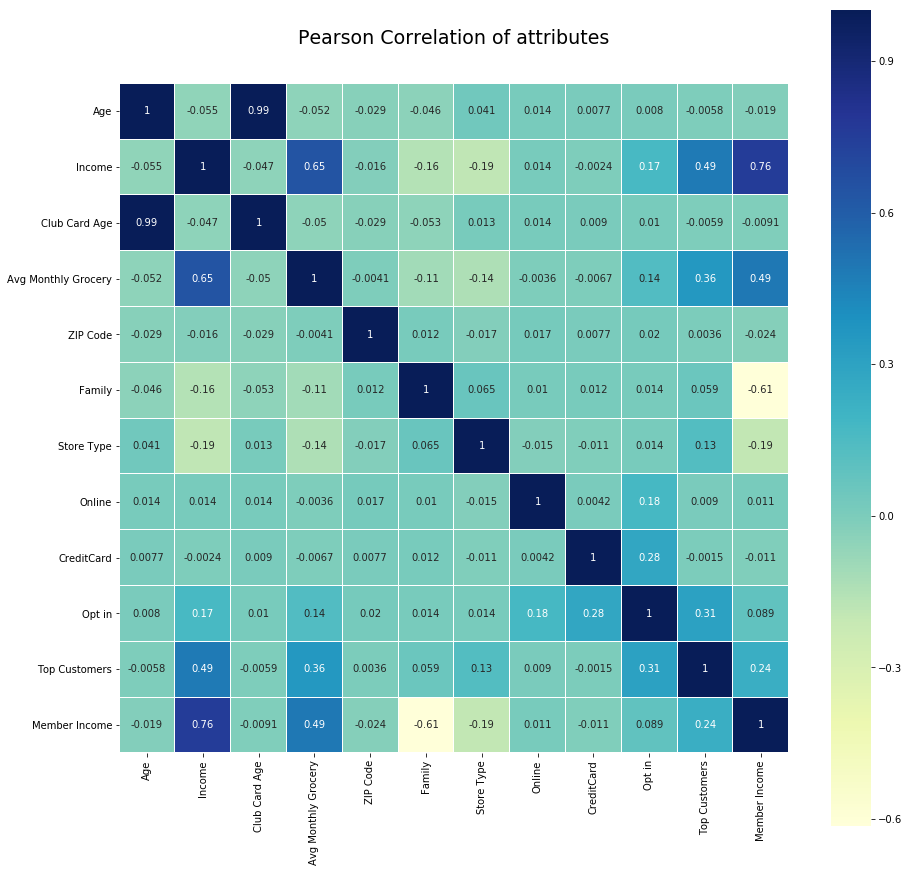

In [7]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap='YlGnBu', 
            linecolor='white',
            annot=True)

Distribution plot of the continuous features:

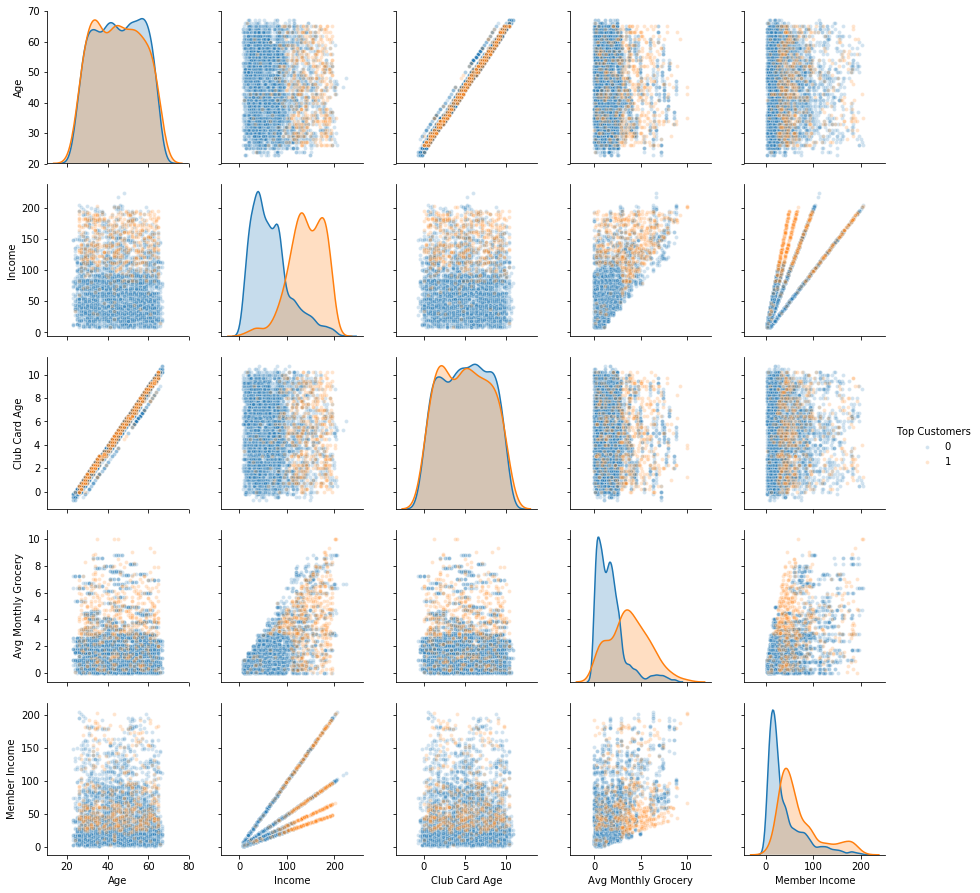

In [8]:
sns.pairplot(df, 
             hue='Top Customers', 
             hue_order=[0,1],  
             plot_kws={"s": 15,'alpha': 0.2}, 
             vars=['Age', 'Income', 'Club Card Age', 'Avg Monthly Grocery', 'Member Income']) 

## Observations:

1 - 'Age' and 'Club Card Age' are highly correlated (0.99): this is a redundant information and we should remove one of these two features.

2 - The 'Zip Code' is a categorical variable with high cardinality. I could convert the feature in a string and then remove part of the Zip Code keeping only the first 2 digits to get the area of the postcode: this will decrease the cartdinality of the categorical feature. Once done that, I have to encode the feature. There are many way for this: label encoding, one-hot encoding, count encoding, target encoding, CatBoost Encoding and Encoding with Singular Value Decomposition. I have chosen the label encoding methodology.

3 - 'Income', 'Avg Montly Grocery' and 'Member Income' have a distribution skewed to the right. I could apply some transformation to make their distributions more similar to a bell curve. By doing this, I could improve the model performance, but I'd loose interpretability. For this reason, I won't apply any transformation to 'Income' and 'Avg Montly Grocery' features.

4 - 'Store Type' is a categorical variable with label encoding already applied. By doing it, the model might think that there is an order across the different type of stores (1-Supermarket* Express < 2-Extra < 3-Super). This is obviusly not correct. To improve the model, I should encode this feature using another encoder method, but I'd loose interpretability and this is the reason why I won't apply any transformation the 'Store Type' feature.

5 - The data are in different scales: I have scale the dataset, i.e., I could apply normalization.

**Step 1: 'Age' and 'Club Card Age' correlation**

In [9]:
df = df.drop('Age',axis=1)

**Step 2: 'Zip Code'**

In [10]:
df['ZIP Code'] = df['ZIP Code'].astype(str).str.slice(0, 2)
label_encoder = preprocessing.LabelEncoder()
df['ZIP Code']= label_encoder.fit_transform(df['ZIP Code']) # Encode labels in column 'species'
df['ZIP Code'].unique() 

array([1, 0, 4, 2, 3, 5, 6], dtype=int64)

The next step would be to normalize (or standardize) the dataset. For some models this step is mandatory (e.g., ANN requires normalisation) and usually it improves the speed and performance. 

The drawback is that we partially loose interpretability, which is an important factor in this case study (unless you use the inverse function).

In this notebook I am going to use Random Forest which doesn't require feature scaling.

Calculate 'Top Customers' ratio:

In [11]:
n_true = len(df.loc[df['Top Customers'] == True])
n_false = len(df.loc[df['Top Customers'] == False])
print("Number of Top Customers: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Other Customers: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Top Customers: 500 (10.00%)
Number of Other Customers: 4500 (90.00%)


## Spliting the data in train and test set
I am going to use 75% of data for training and 25% for testing. I will use cross-validation to evaluate the model. Then, I will use the testset to test my results. Please bear in mind that this step is not strictly neccesary in this case study because I will have already applied the cross-validation at this point.

Let’s also shuffle the dataset. This will guarantee that all cross-validation folds will
be similar. Moreover, some learning algorithms are sensitive to the order of the training instances. Shuffling the dataset ensures that this won’t happen.

In [12]:
df = df.sample(frac=1)

X = df.drop('Top Customers',axis=1)
Y = df['Top Customers']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

X_train.head()

,Income,Club Card Age,Avg Monthly Grocery,ZIP Code,Family,Store Type,Online,CreditCard,Opt in,Member Income
ID,,,,,,,,,,
1974,11,5.50,0.0,2,2,1,0,0,0,5.500000
2279,204,1.00,4.5,1,2,1,1,0,0,102.000000
2476,79,6.50,0.8,5,3,1,0,0,0,26.333333
4943,109,6.50,2.4,4,1,1,1,1,1,109.000000
227,39,-0.25,1.7,4,2,2,0,0,0,19.500000


Let's check the split of data:

In [13]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

75.00% data is in training set
25.00% data is in test set


Check _Top / Other Cutomers ratio_ of the split data. This is a sanity check to assure a correct stratified sampling of the Top Customers: we would like to have a similar Top / Others Customers ratio in training and test set.

In [14]:
print("Original Top Values       {0} ({1:0.2f}%)".format(len(df.loc[df['Top Customers'] == 1]), (len(df.loc[df['Top Customers'] == 1])/len(df.index)) * 100))
print("Original Others Values    {0} ({1:0.2f}%)".format(len(df.loc[df['Top Customers'] == 0]), (len(df.loc[df['Top Customers'] == 0])/len(df.index)) * 100))
print("")
print("Training Top Values       {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Others Values    {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Top Values           {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Others Values        {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Top Values       500 (10.00%)
Original Others Values    4500 (90.00%)

Training Top Values       367 (9.79%)
Training Others Values    3383 (90.21%)

Test Top Values           133 (10.64%)
Test Others Values        1117 (89.36%)


## Model Building: estimate a Random Forest classification models to predict the likelihood of belonging to the Top Customers

We are dealing with a supervised classification unbalanced binary problem: accuracy is not the best parameter to evaluate the models perfromances because it is unbalanced.

The best (and longest!) option to evaluate the model performance is the Scikit-Learn’s cross-validation feature. The metric to look at to find a good balance between precision and recall is the F1 score (higher is better).

In [15]:
param_grid = [{'n_estimators': [20,50], 
               'max_features': [3,6],
               'max_depth': [2,3,4], # I keep the max_depth small to visualize one of the tree
               'max_leaf_nodes': [50,100],
               'bootstrap': [False, True]}]
f1_scorer = make_scorer(f1_score)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=10, scoring=f1_scorer)
grid_search_rf.fit(X_train, y_train)

rf = RandomForestClassifier(bootstrap=grid_search_rf.best_params_.get("bootstrap"),
                            max_features=grid_search_rf.best_params_.get("max_features"),
                            max_depth=grid_search_rf.best_params_.get("max_depth"),
                            max_leaf_nodes=grid_search_rf.best_params_.get("max_leaf_nodes"),
                            n_estimators=grid_search_rf.best_params_.get("n_estimators"),
                            random_state=1)

print('Random Forest hyperparameters = ',grid_search_rf.best_params_)

Random Forest hyperparameters =  {'bootstrap': False, 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 50, 'n_estimators': 20}


Print the Random Forest performances and the confusion matrix:

Accuracy = 0.98 
Precision = 0.95 
Recall = 0.84 
F1 = 0.89


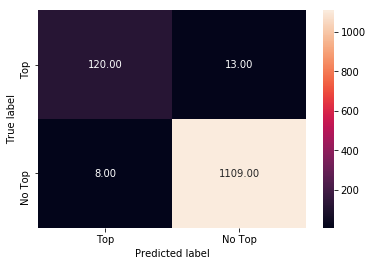

In [16]:
model = rf
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)
df_table = confusion_matrix(y_test,y_predict)
a = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
p = cross_val_score(model, X_train, y_train, cv=10, scoring="precision").mean()
r = cross_val_score(model, X_train, y_train, cv=10, scoring="recall").mean()
f = cross_val_score(model, X_train, y_train, cv=10, scoring="f1").mean()

# Function to draw the confusion matrix
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Top", "No Top"] , yticklabels = ["Top", "No Top"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Accuracy = %0.2f \nPrecision = %0.2f \nRecall = %0.2f \nF1 = %0.2f'% (a, p, r,f))

draw_cm(y_test,model.predict(X_test))

If I want to predict the likelihood of belonging to the 'Top Customers' category, I can use the predict_proba method.<br>
Please note that not all the classifiers have the predict_proba method.

In [17]:
predicted_prob = pd.concat([y_test.reset_index(), round(pd.DataFrame(rf.predict_proba(X_test))[1],3)],axis=1)
predicted_prob.columns = ['ID','Top Customers','Predicted likelihood Top Customers']
predicted_prob = predicted_prob.set_index('ID')
predicted_prob.head()

,Top Customers,Predicted likelihood Top Customers
ID,,
2221,0,0.006
1246,0,0.006
1543,0,0.006
1604,1,0.988
1467,0,0.008


There might space of improvements  for the prediction by tuning a bit more the hyperparameters, choosing other classification models (KNN, Naive Bayes, Logistic regression, SVM, ANN, Adaboost, Bagging, XGboost...) or working on Features Engineering.

Since the scope of the case study is inferring (we need to "understand Supermarket* customers") and not predicting, I won't proceed in any further predictive analysis.

I chose Random Forest because:
- It is an ensemble of Decision Trees, which is a "white box" model compared to other more complicated models, e.g. SVM and ANN
- I can very easy calculate the importance of every features

## Decision Tree Plot

As I mentioned, random forest works on several decision tree. Plotting one of them (we don't want to visualize them all!) gives a general understanding about how the model predicts the value of a target variable by learning simple decision rules inferred from the data features.

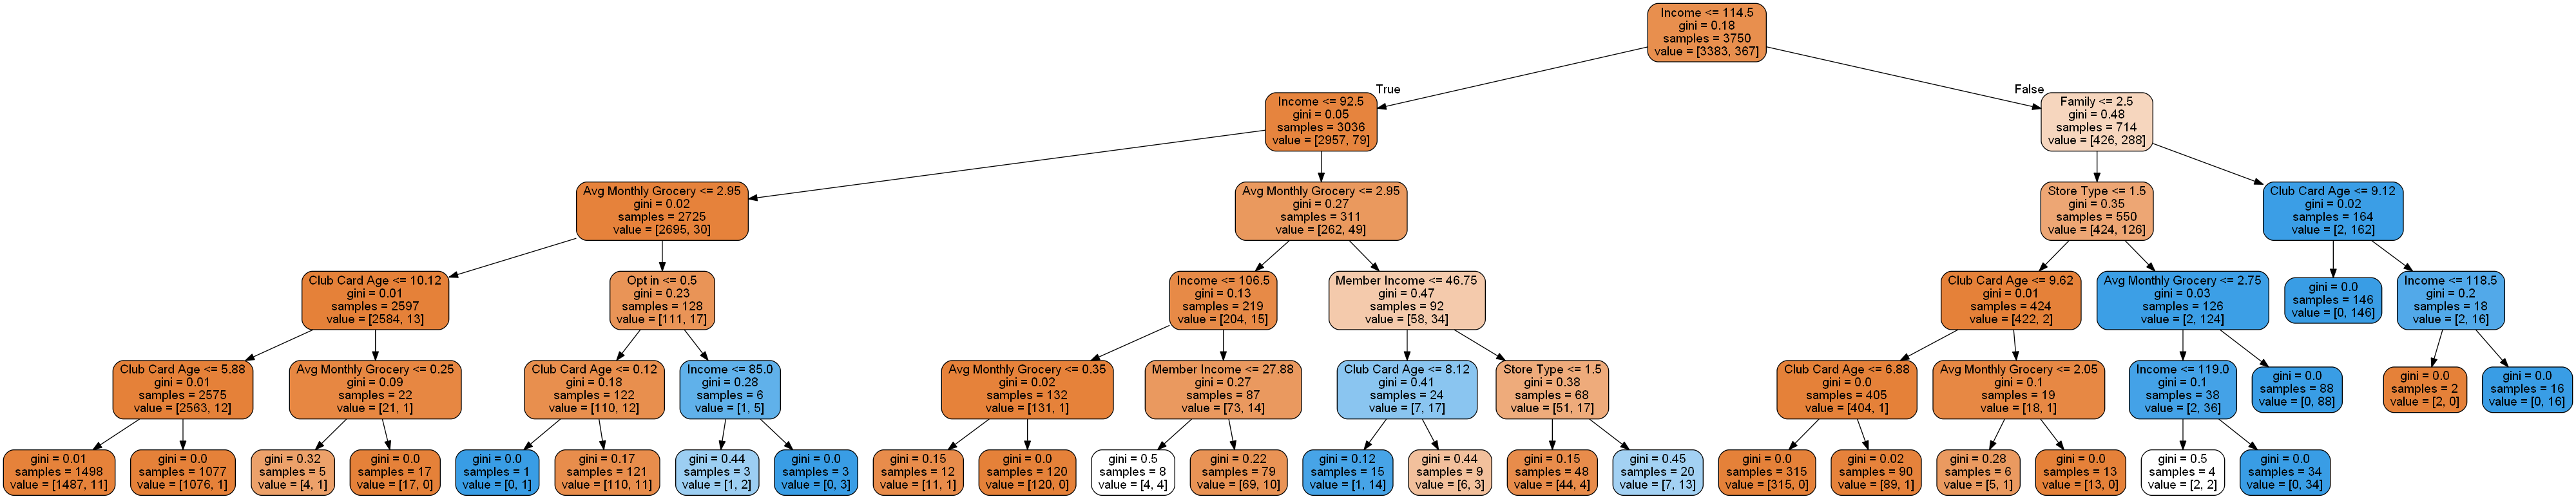

In [18]:
export_graphviz(rf.estimators_[0],
                out_file='tree.dot',
                feature_names=list(X),
                filled=True,
                proportion = False, 
                precision = 2, 
                rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
os.system('dot -Tpng tree.dot -o tree.png')
display(Image(filename='tree.png'))

By double-clicking on the chart, you can zoom it.

## Features Importance Plots:

Text(0, 0.5, 'Features')

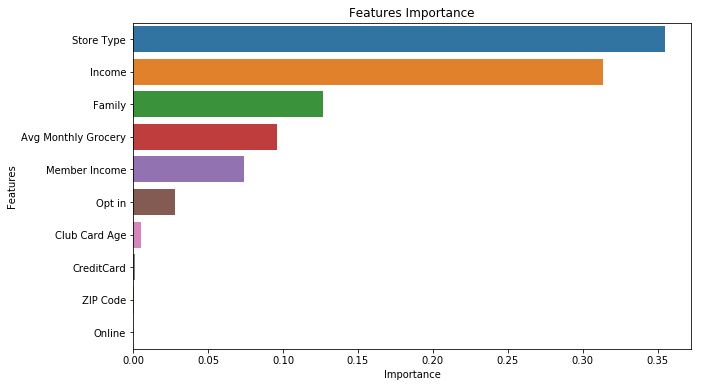

In [19]:
# Fit the RF on the entire dataset
rf.fit(df.drop('Top Customers',axis=1), df['Top Customers'])

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Features Importance")

# Bar chart showing the importance of the imput features
features_importance = pd.concat([pd.DataFrame(df.drop('Top Customers',axis=1).columns),pd.DataFrame(rf.feature_importances_)], axis=1)
features_importance.columns = ['Feature','Importance']
features_importance = features_importance.sort_values('Importance',ascending=False)
sns.barplot(x=features_importance.iloc[:,1], y=features_importance.iloc[:,0])

# Add label for vertical axis
plt.xlabel("Importance")
plt.ylabel("Features")

To better understand how the features are related to the output, we could also use a logistic regression model, which is designed to deal with binary outcome. Please find below the statistic summary of the model:

In [20]:
#Build the logistic regression model
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

#Summary of logistic regression
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.152208
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Top Customers   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3739
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Sep 2019   Pseudo R-squ.:                  0.5249
Time:                        12:41:26   Log-Likelihood:                -570.78
converged:                       True   LL-Null:                       -1201.4
                                        LLR p-value:                8.946e-265
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.6029      0.616    -17.215      0.000     -11.810      -9.396
In

Calculate Odds Ratio, probability:

In [21]:
# Create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Opt in,2.81,16.69,0.94,0.00
Store Type,1.46,4.29,0.81,0.00
Income,0.05,1.05,0.51,0.00
Member Income,-0.01,0.99,0.50,0.00
Online,-0.43,0.65,0.39,0.01
CreditCard,-0.86,0.42,0.30,0.00
const,-10.60,0.00,0.00,0.00


Interpretation: customers which are Opt in have 94% probability with an odds of 16.69 times of being Top Customers

It is interesting to see how the 2 models evaluated in slightly different ways the impotance of the features. Now I am going to check the performance of the Logisti Regression:

Accuracy = 0.95 
Precision = 0.87 
Recall = 0.55 
F1 = 0.67


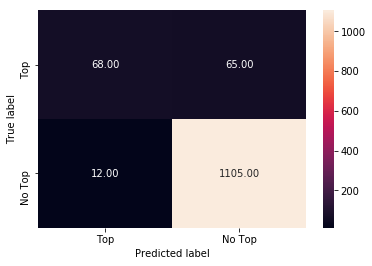

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)
df_table = confusion_matrix(y_test,y_predict)
a = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
p = cross_val_score(model, X_train, y_train, cv=10, scoring="precision").mean()
r = cross_val_score(model, X_train, y_train, cv=10, scoring="recall").mean()
f = cross_val_score(model, X_train, y_train, cv=10, scoring="f1").mean()

print('Accuracy = %0.2f \nPrecision = %0.2f \nRecall = %0.2f \nF1 = %0.2f'% (a, p, r,f))

draw_cm(y_test,model.predict(X_test))

Which model should I trust more? Let's also plot both the ROC curves to compare the models:

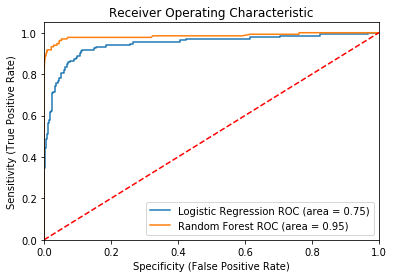

In [23]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Random Forest',
    'model': rf,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   

We can easily see that Random Forest outperformed Logistic Regressions. Because of this, I'll keep working with Random Forest.

## Partial Dependence Plots

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions. It can be interpreted similarly to the coefficients of logistic regression models. Though, partial dependence plots are built on more sophisticated models and they can capture more complex patterns compared to simpler model such as the coefficient of the logist regression.

Below you can see how the top 5 most important featues affected the outcome:

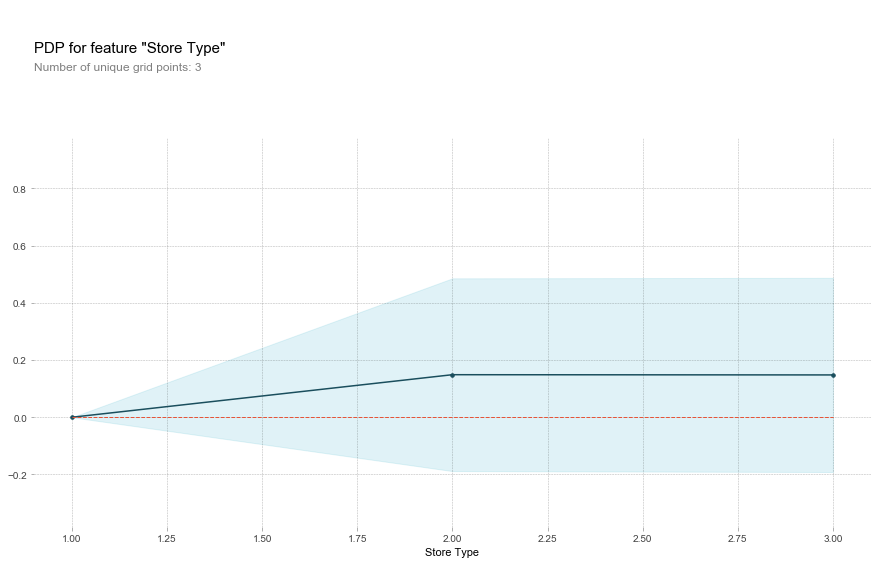

<Figure size 216x144 with 0 Axes>

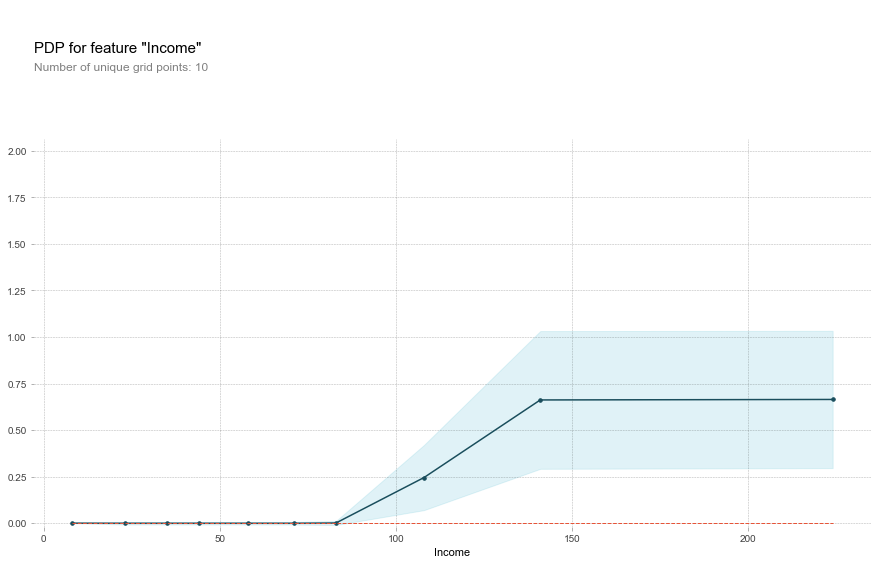

<Figure size 216x144 with 0 Axes>

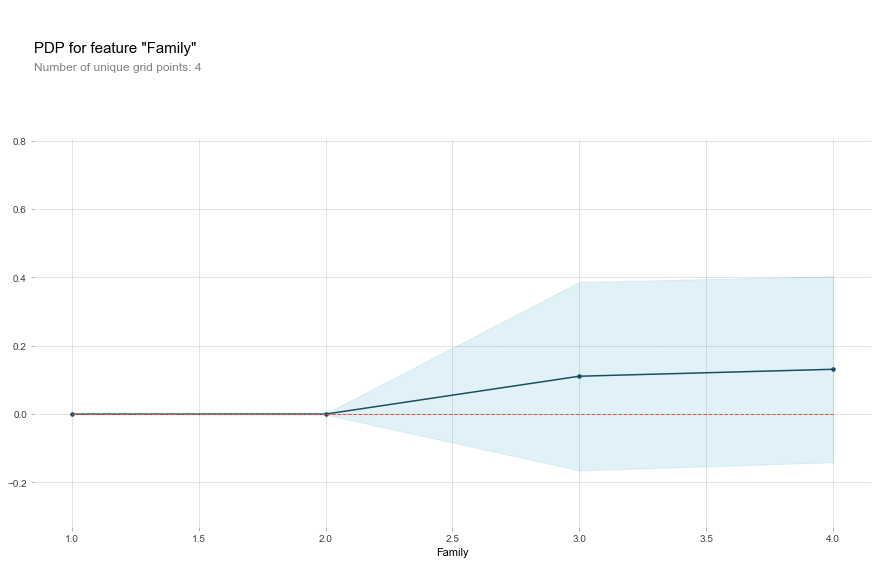

<Figure size 216x144 with 0 Axes>

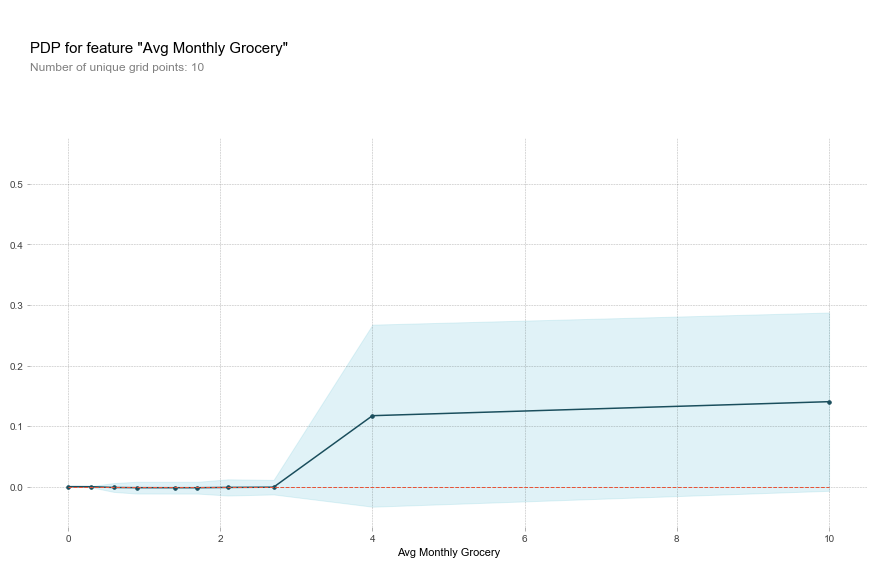

<Figure size 216x144 with 0 Axes>

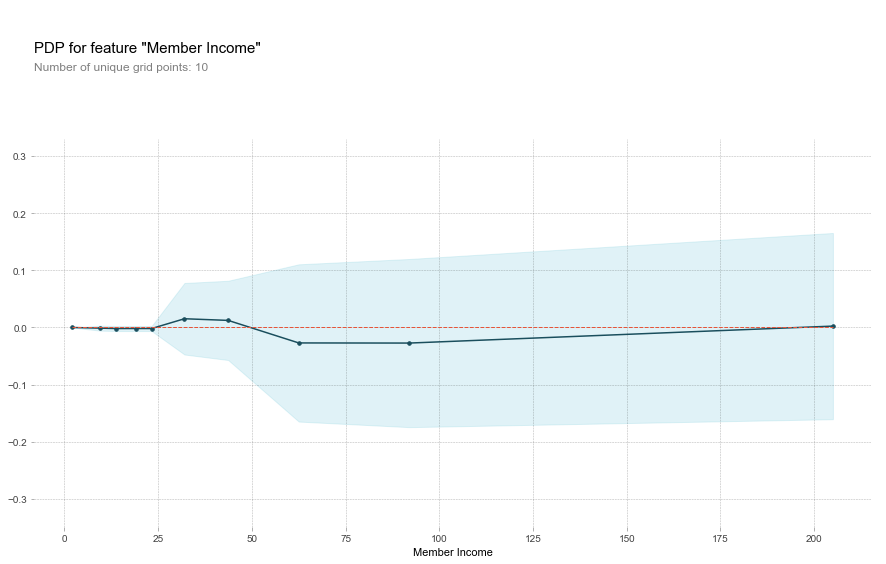

<Figure size 216x144 with 0 Axes>

In [24]:
feature_to_plot=list(features_importance.Feature[:5])

for i in feature_to_plot:
    pdp_i = pdp.pdp_isolate(model=rf, 
                            dataset=df.drop('Top Customers',axis=1), 
                            model_features=list(X), 
                            feature=i)
    pdp.pdp_plot(pdp_i, i)
    plt.figure(figsize=(3,2))
    plt.show()

Please notice the followings in order to interpret the above plots:

- The y axis is interpreted as a change in the prediction from what it would be predicted at the baseline or leftmost value.
- The blue shaded area indicates the level of confidence

I have shown few techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

The SHAP Values (an acronym from SHapley Additive exPlanations) decomposes a prediction by the impact of each feature. Let's visualize a user randomly sampled from the Top Customers:

In [65]:
def shap_value(Dataset,value):
    customer_id = random.choice(list(predicted_prob[predicted_prob['Top Customers']==value].index))
    data_for_prediction = Dataset[Dataset.index==customer_id]  # use 1 row of data here. Could use multiple rows if desired
    data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
    rf.predict_proba(data_for_prediction_array)
    explainer = shap.TreeExplainer(rf) # Create object that can calculate shap values
    shap_values = explainer.shap_values(data_for_prediction) # Calculate Shap values
    shap.initjs()  
    return shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

shap_value(X,1)

-  <span style="color:red">Feature values causing increased predictions are in red</span>, and their visual size shows the magnitude of the feature's effect. 
- <span style="color:blue">Feature values decreasing the prediction are in blue</span>.  

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

Here there is another one for a not 'Top Customers':

In [74]:
shap_value(X,0)

Now, we'll expand on the SHAP values, seeing how aggregating many SHAP values can give more detailed alternatives to feature importance and partial dependence plots.

For example, feature importance doesn't say how much each features matter. If a feature has medium permutation importance, that could mean it has:
- a large effect for a few predictions, but no effect in general
- a medium effect for all predictions.

SHAP summary plots give us a bird-eye view of feature importance and what is driving it:

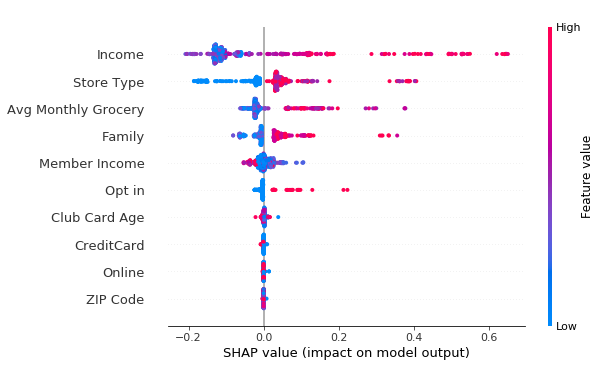

In [29]:
# Create object that can calculate the SHAP values
explainer = shap.TreeExplainer(rf)

# Calculate shap_values for a subset of X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X[:500])

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X[:500])

This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play. Let's see the distribution of 'Income' and its interaction with the 'Store Type', which are the 2 most important features: 

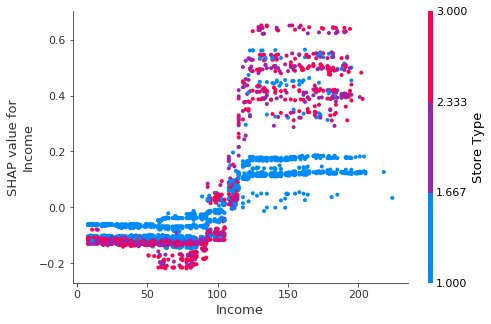

In [30]:
# Create object that can calculate the SHAP values
explainer = shap.TreeExplainer(rf)

# calculate shap_values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot
shap.dependence_plot('Income', shap_values[1], X, interaction_index="Store Type")

Few considerations on the above plot: 
- Each dot is a row of the data. <br> 
- The x (horizontal) axis represents the actual values of the dataset, while the y (vertical) axis represents the impact of the actual values on the prediction. <br> 
- The slope of the trend shows that customers with higher income are more likely to be Top Customers.
<br>
- The colour of the chart describes the Store Type. In general, high Income increases the chance of being a Top Customers, but if the most frequent type of store is a Supermarket* Express ('Store Type'=1), than the impact of income is much lower.

## How could I use this data to personalise Supermarket* communications?

We have the list of all the transactions made: association rule mining is a technique to identify underlying relations between different items, for example finding patters like: "the custumers who bought item A are very likely to buy item B". 

This could be used to generate more profit by targeting the people who buy one of the products with advertisement campaign to buy the other.

There are three major components of Apriori algorithm:
- Support (B) = (Transactions containing (B))/(Total Transactions)
- Confidence (A→B) = (Transactions containing both (A and B))/(Transactions containing A)
- Lift(A→B) = (Confidence (A→B))/(Support (B))

For large sets of data, there can be hundreds of items in hundreds of thousands transactions. This process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

1. Set a minimum value for support and confidence. 
2. Extract all the subsets having higher value of support than minimum threshold.
3. Select all the rules from the subsets with confidence value higher than minimum threshold.
4. Order the rules by descending order of Lift.

In [11]:
df_2 = pd.read_csv('Customers_Transactions.csv', header=None)
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2459,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,1931,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4006,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,777,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4152,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocessing: the Apriori library we are going to use requires our dataset to be in the form of a list of lists:

In [12]:
transactions = []
df_trasaction = df_2.iloc[:,1:]
for i in range(0, 7501):
    transactions.append([str(df_trasaction.values[i,j]) for j in range(1, 20)])                  

Training Apriori on the dataset:

In [13]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)

Visualising the head of results:

In [14]:
for item in results[:3]:

    # first index of the inner list Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th of the third index of the inner list
    print("Confidence: " + str(round(item[2][0][2],2)))
    print("Lift: " + str(round(item[2][0][3],2)))
    print("=====================================")

Rule: bacon -> spaghetti
Support: 0.003
Confidence: 0.39
Lift: 3.07
Rule: light cream -> chicken
Support: 0.004
Confidence: 0.29
Lift: 5.28
Rule: mushroom cream sauce -> escalope
Support: 0.005
Confidence: 0.26
Lift: 4.27


For instance the item with the highest lift aomng the 3 visualized, we can see that light cream and chicken are commonly bought together. This makes sense since people who purchase light cream are careful about what they eat hence they are more likely to buy chicken i.e. white meat instead of red meat i.e. beef. Or this could mean that light cream is commonly used in recipes for chicken.

Let's see what associations had the highest lift:

In [15]:
A = []
B = []
lift = []
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    A.append(items[0])
    B.append(items[1])
    lift.append(round(item[2][0][3],2))
    
association = pd.concat([pd.DataFrame(A),pd.DataFrame(B)],axis=1) # Creating the dataframe
association = association.drop_duplicates(keep='first') # Removing the duplicates
association = pd.concat([association,pd.DataFrame(lift)],axis=1) # Adding the lift
association.columns = ['A','B','Lift'] # Renaming the columns
association = association[(association.A != 'nan') & (association.B != 'nan')] # Removing nan values
association.dropna(inplace=True) # Dropping the NaN
association.sort_values('Lift',ascending=False,inplace=True) # Sorting by Lift
association = association.reset_index(drop=True) # Resetting the index
association

,A,B,Lift
0,honey,fromage blanc,6.22
1,light cream,chicken,5.28
2,parmesan cheese,frozen vegetables,5.15
3,tomatoes,frozen vegetables,5.03
4,frozen vegetables,shrimp,4.89
...,...,...,...
62,soup,milk,3.06
63,frozen vegetables,chocolate,3.05
64,tomatoes,spaghetti,3.04
65,salmon,milk,3.03


I have 500 Top Costumers in the dataset. I would like to indentify if a customer bought in his transfactions one of the items A and he have never bought the corresponding item B. Let's try to find (if any) the top 3 items never bought per customer:

In [19]:
list_items = pd.read_csv('Customers_Transactions.csv', header=None) # Importing the dataset
list_items = list_items.set_index(list_items.columns[0]) # Setting the Customers ID as index
list_items = list_items.stack() # Stacking the items bought
list_items = pd.DataFrame(list_items.reset_index(name='items'))
pd.DataFrame(list_items)
list_items.drop('level_1', axis=1, inplace=True) # Dropping 'level_1'
list_items.columns = ['ID','A'] # Renaming the columns
list_items = list_items.sort_values(by=['ID']) # Sorting by ID
list_items = list_items.drop_duplicates(keep='first') # Remove duplicates rows
list_items = list_items[list_items['ID'].isin(df[df['Top Customers']==1].index.to_list())] # Subset the dataset keeping only the Top Customers ID
list_items = pd.merge(list_items,association,how='outer',on='A') # Merging list_items and association tables
list_items = list_items.sort_values(by=['ID','Lift'],ascending=[True,False]) # Sorting by ID and Lift
list_items.drop('Lift', axis=1, inplace=True) # Dropping the lift
list_items.dropna(inplace=True) # Dropping NaNs
list_items.reset_index(inplace=True, drop=True) # Resetting th index
# Create a list of all the Top Customers with a list of all the items they've bought
list_of_list_items_bought = list_items.iloc[:,:2].drop_duplicates(keep='first').groupby('ID')['A'].apply(list)
test = []
for i in range (0,list_items.index.max()):
    if (list_items.B[i] in (list_of_list_items_bought[list_items.ID[i]])):
        test.append('Yes')
    else:
        test.append('No')
list_items = pd.concat([list_items,pd.DataFrame(test)],axis=1)
list_items.columns = ['ID','A','B','B Already Bought']
list_items = list_items[list_items['B Already Bought']=='No']
list_items.drop(['A', 'B Already Bought'], axis=1,inplace=True)
list_items = list_items.groupby('ID').head(3).reset_index(drop=True)
item_num = []
k=1
for i in range(len(list_items)):
    if list_items.ID.iloc[i] != list_items.ID.iloc[i-1]:  
        k=1
        item_num.append('items'+' '+str(k))     
    else:
        k+=1
        item_num.append('items'+' '+str(k))
list_items = pd.concat([list_items,pd.DataFrame(item_num)],axis=1)
list_items.columns = ['ID','Items','Items num']
list_items = list_items.pivot(index='ID',columns='Items num',values='Items')
list_items.head(15)

Items num,items 1,items 2,items 3
ID,,,
10,frozen vegetables,mineral water,ground beef
19,shrimp,tomato sauce,herb & pepper
30,soup,frozen vegetables,ground beef
43,soup,ground beef,frozen vegetables
48,tomato sauce,herb & pepper,cooking oil
54,mineral water,cake,tomato sauce
58,mineral water,cake,ground beef
79,pasta,ground beef,green tea
92,soup,cake,tomato sauce


I've got reccomendations for only 70% of the Top Customers, because for some of them I didn't have data about their transactions, or because what they've bought was not matching anything in the association table or because they have already bought the items reccomended.

Now I'd supposed to send these information to the Media department, asking them to target with advertisement campaign these customers with these customised offers! Hopefully the customers will try these new items suggested and if he likes the product, he will buy it again generating more revenue in the future.